# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

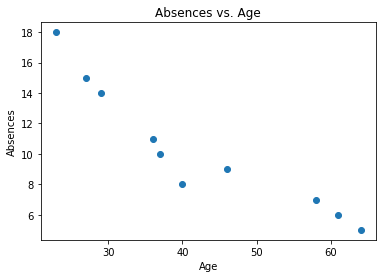

In [14]:
# your code here
absences = pd.read_csv('../Data/absences.csv',index_col=0)
plt.scatter(x = absences['Age'], y = absences['Absences'])
plt.title('Absences vs. Age')
plt.ylabel('Absences')
plt.xlabel('Age')
plt.show()

In [ ]:
# your comments here
#As we can observe, it seems like younger employees attend less to work than older ones.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [18]:
# your code here
def simple_regression(x,y):
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)
    x_y = [(x[i] - mean_x)*(y[i] - mean_y) for i in range(len(x))]
    x_squared = [(x[i] - mean_x)**2 for i in range(len(x))]
    slope = sum(x_y)/sum(x_squared)
    intercept = mean_y - slope*mean_x
    return {'slope':slope,'intercept':intercept}

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

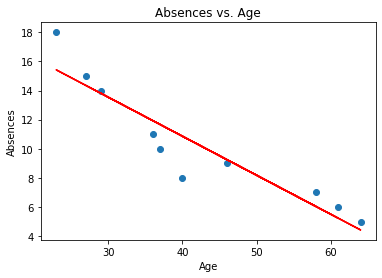

In [30]:
# your code here
slope = simple_regression(absences['Age'], absences['Absences'])['slope']
intercept = simple_regression(absences['Age'], absences['Absences'])['intercept']
predicted_values = [slope*age + intercept for age in absences['Age']]
plt.plot(absences['Age'], predicted_values, c = 'red')
plt.scatter(absences['Age'], absences['Absences'])
plt.title('Absences vs. Age')
plt.ylabel('Absences')
plt.xlabel('Age')
plt.show()

In [ ]:
# your comments here
# Even if there are some differences

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [42]:
# your code here
def cov_corr(x,y):
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    x_y = [(x[i] - x_mean)*(y[i] - y_mean) for i in range(len(x))]
    covariance = sum(x_y)/len(x)
    x_square = [(x[i] - x_mean)**2 for i in range(len(x))]
    y_square = [(y[i] - y_mean)**2 for i in range(len(y))]
    correlation = sum(x_y)/(sum(x_square)*sum(y_square))**0.5
    return {'covariance':covariance,'correlation':correlation}

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [43]:
# your code here
cov_corr(absences.Age,absences.Absences)['correlation'],cov_corr(absences.Age,absences.Absences)['covariance']

(-0.9325434092481012, -51.92999999999999)

In [ ]:
# your comments here

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [44]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [45]:
# your code here
cov_corr(ironbeers_df.X, ironbeers_df.Y)

{'covariance': 10.5, 'correlation': 0.9770084209183943}

In [ ]:
# your comments here
# The hypothesis is false, as the correlation is positive.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

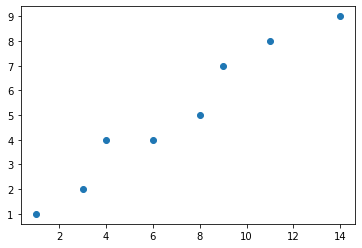

In [46]:
# your code here
plt.scatter(ironbeers_df.X,ironbeers_df.Y)

In [ ]:
# your comments here
# We can observe in the chart above that, as more people you ask to stay, more people stay.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [47]:
# your code here
simple_regression(ironbeers_df.X,ironbeers_df.Y)

{'slope': 0.6363636363636364, 'intercept': 0.5454545454545459}

In [ ]:
# your comments here
# For each additional person that you ask to stay, 0.63 people actually stay.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here
# No! In fact, more people stay because of you! :)

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [48]:
# your code here
slope = simple_regression(ironbeers_df.X,ironbeers_df.Y)['slope']
intercept = simple_regression(ironbeers_df.X,ironbeers_df.Y)['intercept']
ironbeers_df['expected_Y'] = intercept + slope*ironbeers_df['X']

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

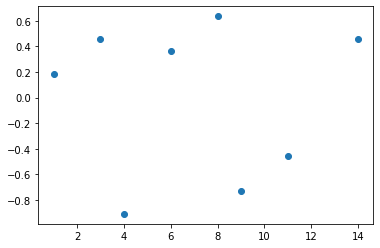

In [49]:
# your code here
ironbeers_df['error'] = ironbeers_df['expected_Y'] - ironbeers_df['Y']
plt.scatter(ironbeers_df.X,ironbeers_df.error)

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here
# In general, the errors are quite close to 0. However, there are some points with quite high errors (4, 8 and 9)

#### 4.- Remove the points with a high error and recalculate the regression line.

In [57]:
# your code here
ironbeers_df_recalc = ironbeers_df[(ironbeers_df['error'] < 0.6) & (ironbeers_df['error'] > -0.6)]
ironbeers_df_recalc

,X,Y,expected_Y,error
0,1,1,1.181818,0.181818
1,3,2,2.454545,0.454545
3,6,4,4.363636,0.363636
6,11,8,7.545455,-0.454545
7,14,9,9.454545,0.454545


#### 5.- Calculate the correlation. What is happening? Comment the result.

In [69]:
# your code here
cov_corr(ironbeers_df_recalc.X.values, ironbeers_df_recalc.Y.values)

{'covariance': 15.4, 'correlation': 0.9945299478460592}

In [ ]:
# your comments here
# The correlation is even higher now than before.